# 2020 LipaNaMpesa Analysis on Twitter
### Analysis By: [@gyleodhis](https://www.twitter.com/gyleodhis)
### ![@SafaricomPLC](lipaNaMpesa.jpg)
#### Licence:
You can use this code for anything you may wish only leave this page:
__AS IS; HOW IS, WHERE IS__

In [57]:
# import tweeter # This module contains the code for connecting to twiter and downloading the tweets. Uncoment this section
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [58]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

## Reading the Tweets

In [79]:
mpesa = pd.read_csv('lipaNaMpesa.csv')
# mpesa.shape
# mpesa.columns
mpesa.head(10)

,Created_at,Location,Retweet_Count,Favorite_Count,Tweet
0,2/21/2020 7:52,NaN,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb'
1,NaN,NaN,NaN,NaN,NaN
2,2/21/2020 7:52,NaN,9.0,0.0,"b'RT @SafaricomPLC: Today, we are awarding our 5th winner of a three-bedroom apartment located in Rituta, Dagoretti in the ongoing Lipa Na M-\xe2\x80\xa6'"
3,NaN,NaN,NaN,NaN,NaN
4,2/21/2020 7:51,NaN,0.0,0.0,"b'39 year old Edward Opiyo Oluoch, a Mathematics &amp; Geography teacher at Nyamonye Girls Secondary School in Bondo is t\xe2\x80\xa6 https://t.co/lF2SCScoUd'"
5,NaN,NaN,NaN,NaN,NaN
6,2/21/2020 7:50,NaN,18.0,0.0,b'RT @christi90892176: One reason that makes me find this man interesting is that he is all alone fighting a congregation of powerful men. He\xe2\x80\xa6'
7,NaN,NaN,NaN,NaN,NaN
8,2/21/2020 7:50,NaN,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb'
9,NaN,NaN,NaN,NaN,NaN


### How many tweets have we downloaded
__The code below shows that we have pulled down 34K tweets.__

In [80]:
mpesa.shape

(3465, 5)

### Let us Convert the time the tweets were created into the index of the dataframe
__First we convert the "Created_at" column into pandas datetime dataframe__

In [81]:
mpesa['Created_at'] =  pd.to_datetime(mpesa['Created_at'])
#mpesa.dtypes
#mpesa["Created_at"].value_counts()
mpesa.index = mpesa['Created_at']
mpesa = mpesa.drop(columns=['Created_at','Location'])
mpesa = mpesa.dropna() #this line drops all NAN values.
mpesa.head()

,Retweet_Count,Favorite_Count,Tweet
Created_at,,,
2020-02-21 07:52:00,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb'
2020-02-21 07:52:00,9.0,0.0,"b'RT @SafaricomPLC: Today, we are awarding our 5th winner of a three-bedroom apartment located in Rituta, Dagoretti in the ongoing Lipa Na M-\xe2\x80\xa6'"
2020-02-21 07:51:00,0.0,0.0,"b'39 year old Edward Opiyo Oluoch, a Mathematics &amp; Geography teacher at Nyamonye Girls Secondary School in Bondo is t\xe2\x80\xa6 https://t.co/lF2SCScoUd'"
2020-02-21 07:50:00,18.0,0.0,b'RT @christi90892176: One reason that makes me find this man interesting is that he is all alone fighting a congregation of powerful men. He\xe2\x80\xa6'
2020-02-21 07:50:00,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb'


## At what time were most tweets tweeted
__We can see that the highest number of tweeting occured at around 14th February__

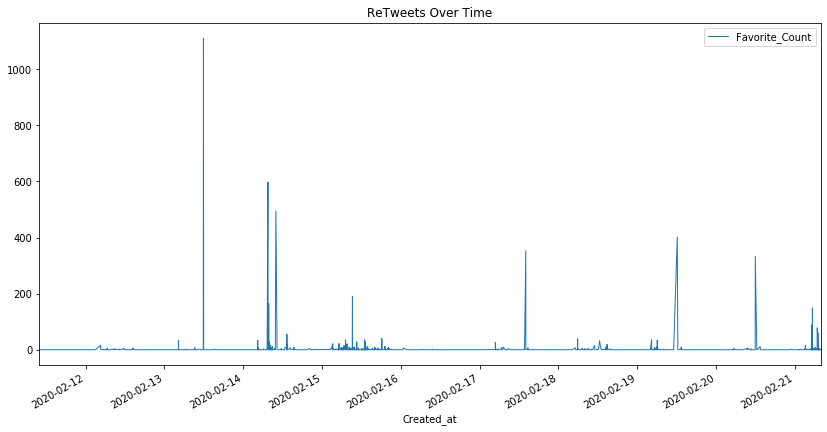

In [82]:
mpesa[['Favorite_Count']].plot(linewidth=1, figsize=(14,7), title="ReTweets Over Time")

### The average total length of the tweets
__We can see that most tweets were 140 characters.__

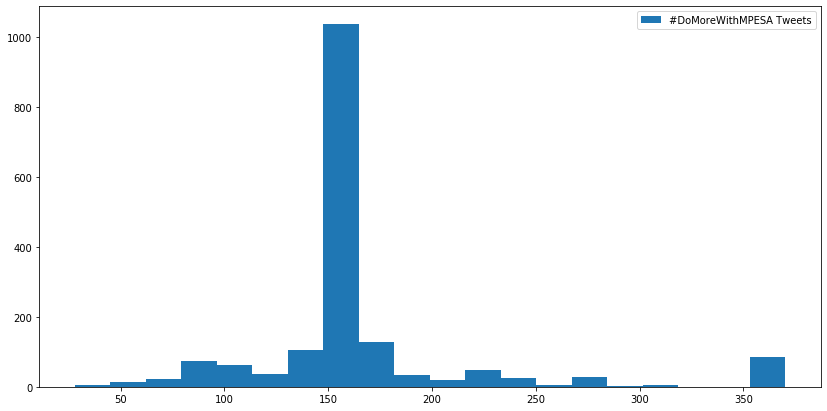

In [83]:
length_mpesa = mpesa['Tweet'].str.len() 
plt.figure(figsize=(14,7))
plt.hist(length_mpesa, bins=20, label="#DoMoreWithMPESA Tweets") 
plt.legend() 
plt.show()

Given below is a user-defined function to remove unwanted text patterns from the tweets.

## Cleaning the Tweets
#### The code below uses REGEX to remove unwanted texts

In [84]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

We will be following the steps below to clean the raw tweets in out data.

- We will remove the twitter handles as they are already masked as @user due to privacy concerns. These twitter handles hardly give any information about the nature of the tweet.

- We will also get rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different types of tweets.

- Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.

- Lastly, we will normalize the text data. For example, reducing terms like loves, loving, and lovable to their base word, i.e., ‘love’.are often used in the same context. If we can reduce them to their root word, which is ‘love’. It will help in reducing the total number of unique words in our data without losing a significant amount of information.



### Removing Twitter Handles (@user)

In [85]:
mpesa['tidy_tweet'] = np.vectorize(remove_pattern)(labour['Tweet'], "@[\w]*") 
mpesa.head()

,Retweet_Count,Favorite_Count,Tweet,tidy_tweet
Created_at,,,,
2020-02-21 07:52:00,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb',b'RT : Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb'
2020-02-21 07:52:00,9.0,0.0,"b'RT @SafaricomPLC: Today, we are awarding our 5th winner of a three-bedroom apartment located in Rituta, Dagoretti in the ongoing Lipa Na M-\xe2\x80\xa6'","b'RT : Today, we are awarding our 5th winner of a three-bedroom apartment located in Rituta, Dagoretti in the ongoing Lipa Na M-\xe2\x80\xa6'"
2020-02-21 07:51:00,0.0,0.0,"b'39 year old Edward Opiyo Oluoch, a Mathematics &amp; Geography teacher at Nyamonye Girls Secondary School in Bondo is t\xe2\x80\xa6 https://t.co/lF2SCScoUd'","b'39 year old Edward Opiyo Oluoch, a Mathematics &amp; Geography teacher at Nyamonye Girls Secondary School in Bondo is t\xe2\x80\xa6 https://t.co/lF2SCScoUd'"
2020-02-21 07:50:00,18.0,0.0,b'RT @christi90892176: One reason that makes me find this man interesting is that he is all alone fighting a congregation of powerful men. He\xe2\x80\xa6',b'RT : One reason that makes me find this man interesting is that he is all alone fighting a congregation of powerful men. He\xe2\x80\xa6'
2020-02-21 07:50:00,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb',b'RT : Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb'


###  Removing Punctuations, Numbers, and Special Characters

In [86]:
mpesa['tidy_tweet'] = mpesa['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
mpesa['tidy_tweet'] = mpesa['tidy_tweet'].str.replace("[https://]", " ")
mpesa['tidy_tweet'].head(30)

Created_at
2020-02-21 07:52:00                                                                                 b RT   D  Ru o And   e  ro  ecy i  now on cau e #DoMoreWi  MPESA  n#Ru oRebelMovemen  Babu Kibaki           co wdUvMg  Vb 
2020-02-21 07:52:00                                                              b RT   Today  we are awarding our     winner of a   ree bedroom a ar men  loca ed in Ri u a  Dagore  i in   e ongoing Li a Na M  xe  x   xa  
2020-02-21 07:51:00                                             b    year old Edward O iyo Oluoc   a Ma  ema ic   am   Geogra  y  eac er a  Nyamonye Girl  Secondary Sc ool in Bondo i    xe  x   xa            co lF SCScoUd 
2020-02-21 07:50:00                                                                 b RT   One rea on   a  make  me find   i  man in ere  ing i    a   e i  all alone fig  ing a congrega ion of  owerful men  He xe  x   xa  
2020-02-21 07:50:00                                                                              

###  Removing Short Words
I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [87]:
mpesa['tidy_tweet'] = mpesa['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
mpesa.head()

,Retweet_Count,Favorite_Count,Tweet,tidy_tweet
Created_at,,,,
2020-02-21 07:52:00,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb',#DoMoreWi MPESA n#Ru oRebelMovemen Babu Kibaki wdUvMg
2020-02-21 07:52:00,9.0,0.0,"b'RT @SafaricomPLC: Today, we are awarding our 5th winner of a three-bedroom apartment located in Rituta, Dagoretti in the ongoing Lipa Na M-\xe2\x80\xa6'",Today awarding winner bedroom loca Dagore ongoing
2020-02-21 07:51:00,0.0,0.0,"b'39 year old Edward Opiyo Oluoch, a Mathematics &amp; Geography teacher at Nyamonye Girls Secondary School in Bondo is t\xe2\x80\xa6 https://t.co/lF2SCScoUd'",year Edward Oluoc Geogra Nyamonye Girl Secondary Bondo SCScoUd
2020-02-21 07:50:00,18.0,0.0,b'RT @christi90892176: One reason that makes me find this man interesting is that he is all alone fighting a congregation of powerful men. He\xe2\x80\xa6',make find alone congrega owerful
2020-02-21 07:50:00,22.0,0.0,b'RT @JohnhayesK: Dp Ruto And the prophecy is now on cause #DoMoreWithMPESA \n#RutoRebelMovement Babu Kibaki https://t.co/wdUvMg30Vb',#DoMoreWi MPESA n#Ru oRebelMovemen Babu Kibaki wdUvMg


### Text Normalization

Before we normalize the tweets we will have to tokenize the tweets.

In [88]:
tokenized_tweet = mpesa['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

Created_at
2020-02-21 07:52:00               [#DoMoreWi, MPESA, n#Ru, oRebelMovemen, Babu, Kibaki, wdUvMg]
2020-02-21 07:52:00                   [Today, awarding, winner, bedroom, loca, Dagore, ongoing]
2020-02-21 07:51:00    [year, Edward, Oluoc, Geogra, Nyamonye, Girl, Secondary, Bondo, SCScoUd]
2020-02-21 07:50:00                                      [make, find, alone, congrega, owerful]
2020-02-21 07:50:00               [#DoMoreWi, MPESA, n#Ru, oRebelMovemen, Babu, Kibaki, wdUvMg]
Name: tidy_tweet, dtype: object

### Now we can now normalize the tokenized tweets.


In [89]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

### Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

In [90]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
mpesa['tidy_tweet'] = tokenized_tweet

## Understanding the common words used in the tweets: WordCloud
Let’s visualize all the words our data using the wordcloud plot.

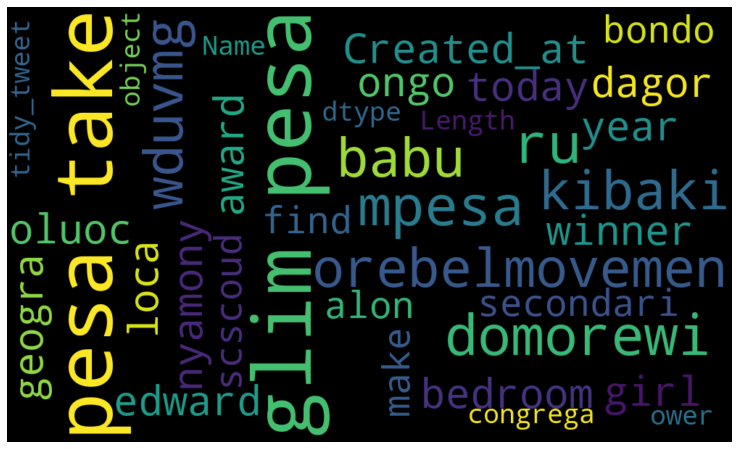

In [91]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_tweet)) 
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### The bigger the word the more it was used in this hastag

### The impact of Hashtags on tweets sentiment
__The fucntion below is used to collect the most used hastag__

In [96]:
# function to collect hashtags 
def hashtag_extract(x):
    hashtags = []    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
        return hashtags
HT_regular = hashtag_extract(mpesa['tidy_tweet']) 
HT_regular = sum(HT_regular,[])

__Now that we have prepared our lists of hashtags, we can plot the top ‘n’ hashtags__

### Most Common Hashtags in Relation to #DoMOreWithMpesa

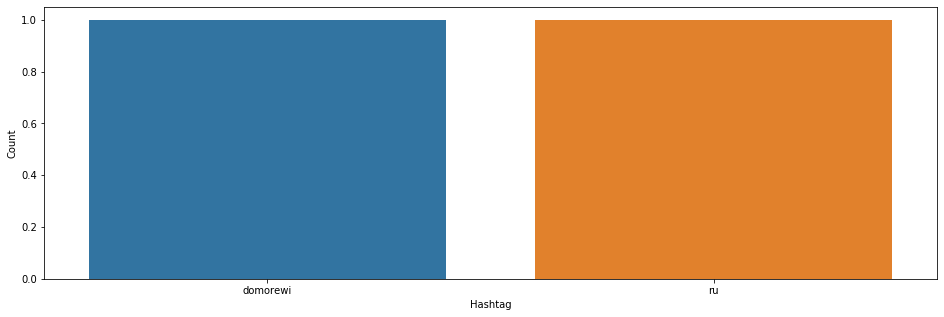

In [97]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## That's it guys.
### My sismple analysis of the #DoMoreWithMPESA hastag.
### Comments and suggestions are welcomed
### Bye people.